# Lab 4
Sean Wade

In [1]:
import numpy as np
import scipy as sp
import seaborn
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from __future__ import division

In [2]:
%matplotlib inline

### Problem 1

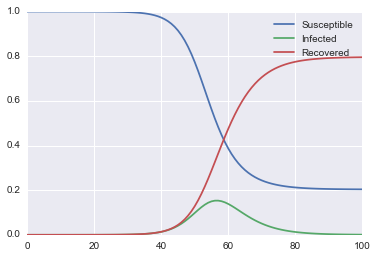

In [3]:
def ode(y, x):
    return np.array([-.5*y[1]*y[0], 
                    .5*y[1]*y[0] - .25*y[1],
                    .25*y[1]])

y0 = np.array([1-6.25e-7, 6.25e-7, 0])
x = np.linspace(0,100,101)
y = odeint(ode, y0, x)
y1, y2, y3 = y[:,0], y[:,1], y[:,2]

plt.plot(x, y1, label="Susceptible")
plt.plot(x, y2, label="Infected")
plt.plot(x, y3, label="Recovered")
plt.legend()

plt.show()

### Problem 2

People can work: 2099182


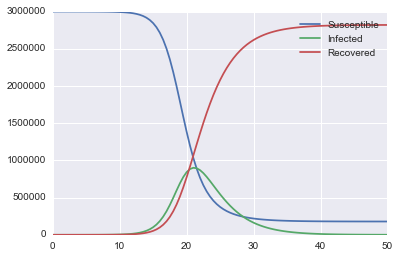

People can work: 1264425


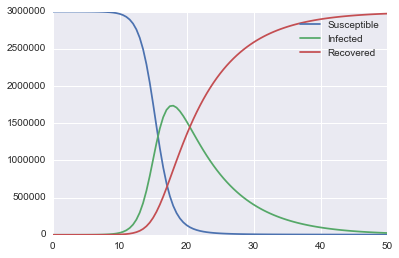

In [4]:
for days_infected in (3,7):
    cpd = 1 # contacts per day
    population = 3e6

    beta = cpd / population
    gamma = 1. / days_infected

    def ode(y, x):
        return np.array([-beta*y[1]*y[0], 
                        beta*y[1]*y[0] - gamma*y[1],
                        gamma*y[1]])

    y0 = np.array([population, 5., 0.])
    x = np.linspace(0,50,101)
    y = odeint(ode, y0, x)
    y1, y2, y3 = y[:,0], y[:,1], y[:,2]

    plt.plot(x, y1, label="Susceptible")
    plt.plot(x, y2, label="Infected")
    plt.plot(x, y3, label="Recovered")
    plt.legend()
    t = np.argmax(y[:,1])
    print "People can work: %s" % str(int(y[t,0])+int(y[t,2]))
    plt.show()

### Problem 3

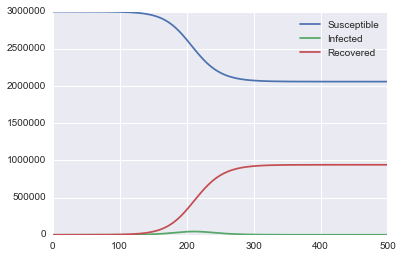

In [5]:
cpd = 3./10. # contacts per day
population = 3e6
days_infected = 4.
beta = cpd / population
gamma = 1. / days_infected

def ode(y, x):
    return np.array([-beta*y[1]*y[0], 
                    beta*y[1]*y[0] - gamma*y[1],
                    gamma*y[1]])

y0 = np.array([population, 5., 0.])
x = np.linspace(0,500,1000)
y = odeint(ode, y0, x)
y1, y2, y3 = y[:,0], y[:,1], y[:,2]

plt.plot(x, y1, label="Susceptible")
plt.plot(x, y2, label="Infected")
plt.plot(x, y3, label="Recovered")
plt.legend()

plt.show()

In [6]:
import numpy as np
from scikits import bvp_solver
import matplotlib.pyplot as plt

epsilon, lbc, rbc = .1, 1., - 1. / 3.

def ode(x , y):
    # return [s',E',I',0,0,0]
    return np.array([y[1] , (1. / epsilon) * (y[0] - y[0] * y[1])])

# The BVP solver package expects you to pass it the boundary
# conditions as a callable function that computes the difference
# between a guess at the boundary conditions
# and the desired boundary conditions.
# When we use the BVP solver, we will tell it how many constraints
# there should be on each side of the domain so that it knows
# how many entries to expect in the tuples BCa and BCb.
# In this case, we have one boundary condition on either side.
# These constraints are expected to evaluate to 0 when the
# boundary condition is satisfied.

def bcs(ya, yb):
    BCa = np.array([ya[0] - lbc]) # 1 Boundary condition on the left
    #BCa = ya[:3] - ya[3:]
    BCb = np.array([yb[0] - rbc]) # 1 Boundary condition on the right
    #BCb = yb[:3] - yb[3:]

    return BCa, BCb

problem = bvp_solver.ProblemDefinition(num_ODE=6, 
                                       num_parameters=0, 
                                       num_left_boundary_conditions=3,
                                       boundary_points=(0, 1),
                                       function=ode,
                                       boundary_conditions=bcs)

solution = bvp_solver.solve(problem, solution_guess=(.8,.1,.1,.5,.1,.1))

A = np.linspace(-1., 1., 200)
T = solution(A)
plt.plot(A, T[0,:], '-k', linewidth=2.)
plt.show()

ImportError: cannot import name bvp_solver

In [1]:
import scikits

In [8]:
import scikits.bvp_solver

ImportError: No module named bvp_solver